<a href="https://colab.research.google.com/github/Schreiner-F/Sistemas-de-Control-2-2025/blob/main/Actividad_1_Caso_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 11.4 MB/s eta 0:00:00


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import ss2tf
from control import tf

In [8]:
# Parámetros del circuito
R = 220
L = 0.5
C = 2.2e-6

# Matrices del sistema
Mat_A = np.array([[-R/L, -1/L], [1/C, 0]])
Mat_B = np.array([[1/L], [0]])
Mat_C = np.array([[R, 0]])
Mat_D = np.array([[0]])

# Función de transferencia (usamos [0] para extraer el numerador correcto)
num, den = ss2tf(Mat_A, Mat_B, Mat_C, Mat_D)
G = tf(num[0], den)

# Autovalores del sistema (equivale a eig)
a = np.linalg.eigvals(Mat_A)

print (a)

[-220.+927.73428798j -220.-927.73428798j]


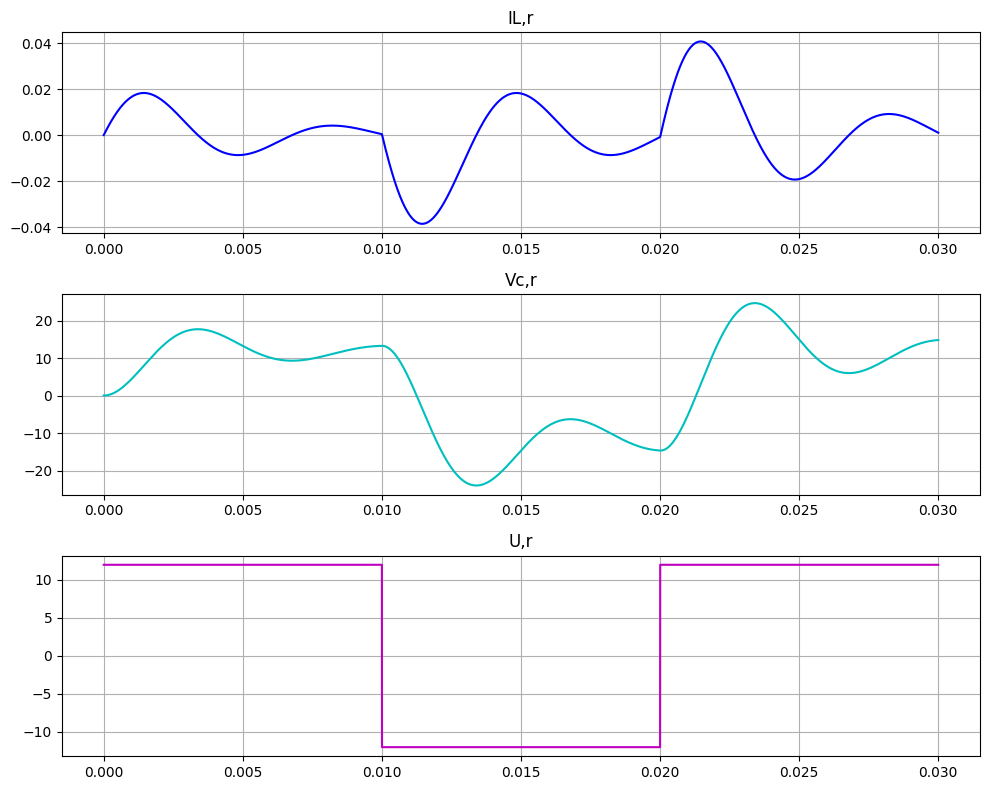

In [9]:
# Tiempo de muestreo y simulación
#At = np.real(np.log(0.95)/a[0]) * 0.9
At = 1e-8
#T = np.real(np.log(0.05)/a[1]) * 2.4
T = 30e-3

# Condiciones iniciales
#Kmax = int(np.round(T / At))
Kmax = round(T / At)
Il = np.zeros(Kmax)
Vc = np.zeros(Kmax)
u = np.zeros(Kmax)
t = np.linspace(0, T, Kmax)

#x = np.array([[0.0], [0.0]])
#X0 = np.array([[0.0], [0.0]])

x = np.zeros((2,1))
X0 = np.zeros((2,1))

vin = 12
ii = 0

#bucle para generar la señal.
for i in range(Kmax):
    ii += At
    if ii >= 10e-3:
        vin = -vin
        ii = 0
    u[i] = vin
    #xp = Mat_A @ (x - X0) + Mat_B * u[i]
    xp = Mat_A @ (x - X0) + Mat_B @ np.array([[u[i]]])

    x = x + xp * At
    Il[i] = x[0,0]
    Vc[i] = x[1,0]

# Gráficas
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(t, Il, 'b')
plt.title('IL,r')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, Vc, 'c')
plt.title('Vc,r')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, u, 'm')
plt.title('U,r')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
xp = Mat_A @ (x - X0) + Mat_B * u[i]

print (xp)
print(f"Paso {i}")
print("x =\n", x)
print("X0 =\n", X0)
print("u[i] =", u[i])
print("Mat_A =\n", Mat_A)
print("Mat_B =\n", Mat_B)


[[nan]
 [nan]]
Paso 349
x =
 [[nan]
 [nan]]
X0 =
 [[0.]
 [0.]]
u[i] = -12.0
Mat_A =
 [[-4.7e+08 -1.0e+05]
 [ 1.0e+07  0.0e+00]]
Mat_B =
 [[100000.]
 [     0.]]


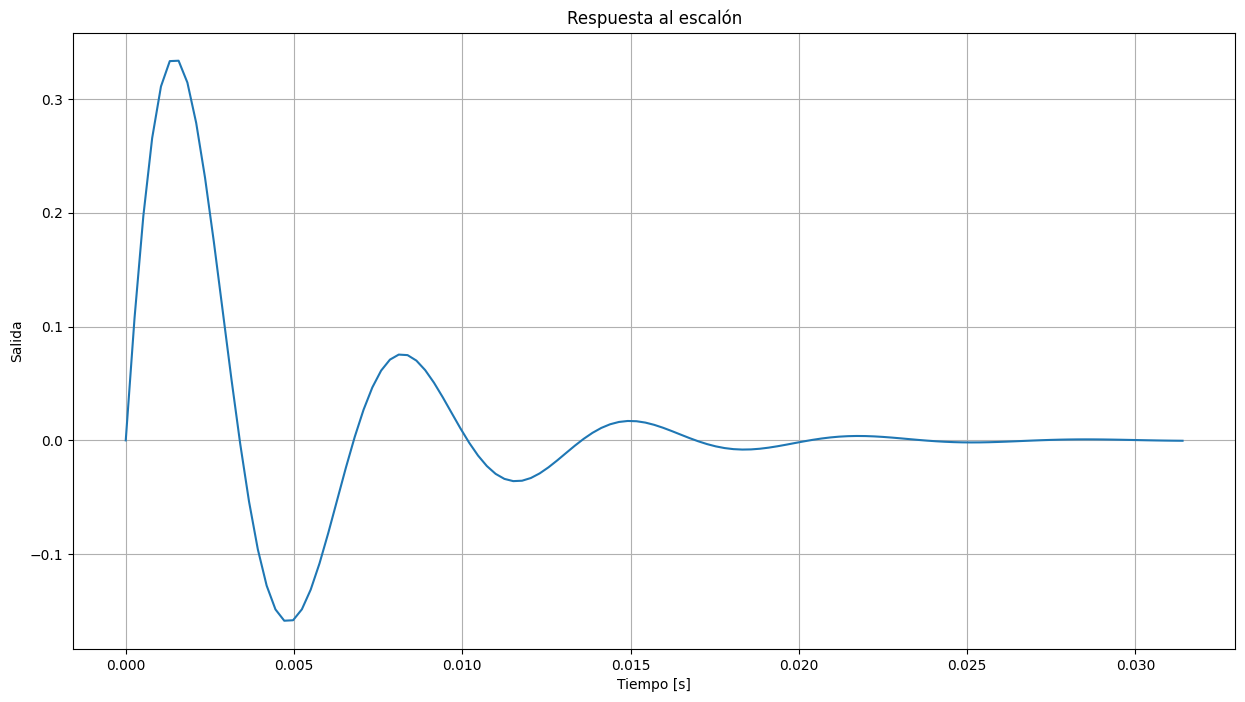

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from control import tf, step_response

t, y = step_response(G)

# Graficás
plt.figure(figsize=(15, 8))
plt.plot(t, y)
plt.title('Respuesta al escalón')
plt.xlabel('Tiempo [s]')
plt.ylabel('Salida')
plt.grid(True)
plt.show()